# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [3]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [5]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.036456) Topic42_ec
2. Feature 17 (0.029122) Topic12_ec
3. Feature 82 (0.026250) Topic63_ic
4. Feature 7 (0.025093) Topic4_ec
5. Feature 83 (0.024939) Topic63_ec
6. Feature 68 (0.023808) Topic55_ic
7. Feature 61 (0.023561) Topic51_ec
8. Feature 66 (0.023007) Topic54_ic
9. Feature 70 (0.021793) Topic56_ic
10. Feature 19 (0.020554) Topic13_ec
11. Feature 6 (0.020423) Topic4_ic
12. Feature 63 (0.019115) Topic52_ec
13. Feature 71 (0.018698) Topic56_ec
14. Feature 16 (0.018182) Topic12_ic
15. Feature 28 (0.017119) Topic19_ic
16. Feature 131 (0.016490) Topic97_ec
17. Feature 69 (0.015567) Topic55_ec
18. Feature 21 (0.014496) Topic14_ec
19. Feature 29 (0.014389) Topic19_ec
20. Feature 20 (0.013672) Topic14_ic
21. Feature 175 (0.013622) Topic136_ec
22. Feature 15 (0.013426) Topic10_ec
23. Feature 67 (0.013306) Topic54_ec
24. Feature 18 (0.012755) Topic13_ic
25. Feature 12 (0.012397) Topic9_ic
26. Feature 0 (0.012268) Topic1_ic
27. Feature 4 (0.011665) Topic3_ic

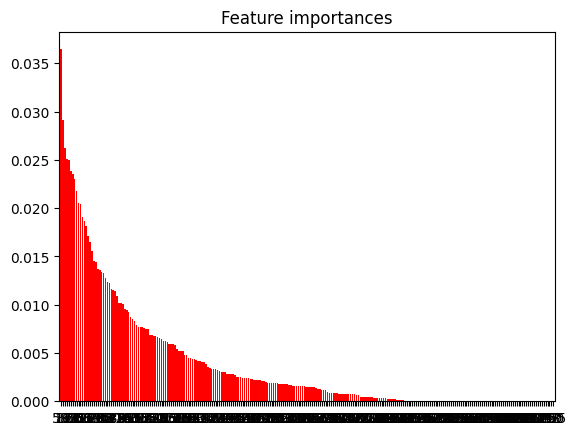

In [6]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024282) Topic4_ec
2. Feature 17 (0.023482) Topic12_ec
3. Feature 68 (0.023155) Topic55_ic
4. Feature 6 (0.021791) Topic4_ic
5. Feature 19 (0.021764) Topic13_ec
6. Feature 16 (0.021454) Topic12_ic
7. Feature 21 (0.021373) Topic14_ec
8. Feature 82 (0.020619) Topic63_ic
9. Feature 83 (0.020394) Topic63_ec
10. Feature 18 (0.020361) Topic13_ic
11. Feature 20 (0.019985) Topic14_ic
12. Feature 71 (0.019805) Topic56_ec
13. Feature 70 (0.019647) Topic56_ic
14. Feature 59 (0.019416) Topic42_ec
15. Feature 66 (0.018188) Topic54_ic
16. Feature 4 (0.016976) Topic3_ic
17. Feature 69 (0.016903) Topic55_ec
18. Feature 61 (0.016439) Topic51_ec
19. Feature 67 (0.016271) Topic54_ec
20. Feature 28 (0.014192) Topic19_ic
21. Feature 29 (0.014179) Topic19_ec
22. Feature 12 (0.011902) Topic9_ic
23. Feature 35 (0.011475) Topic24_ec
24. Feature 1 (0.011375) Topic1_ec
25. Feature 105 (0.011193) Topic74_ec
26. Feature 22 (0.011017) Topic15_ic
27. Feature 87 (0.010834) Topic65_ec
2

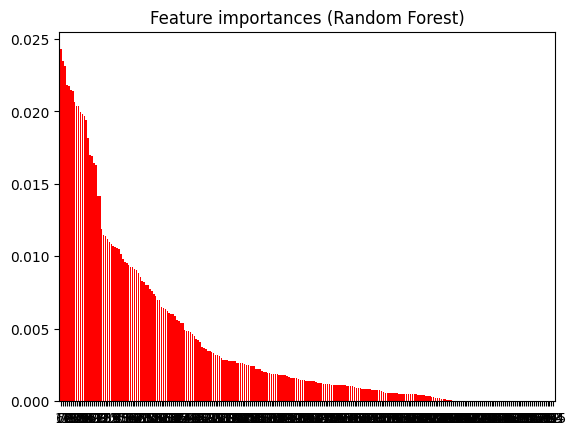

In [7]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.036456       0.019416
1         17       0.029122       0.023482
2         82       0.026250       0.020619
3          7       0.025093       0.024282
4         83       0.024939       0.020394
..       ...            ...            ...
251      217       0.000000       0.000000
252      218       0.000000       0.000000
253      219       0.000000       0.000000
254      220       0.000000       0.000000
255      255       0.000000       0.000000

[256 rows x 3 columns]


In [9]:
percentile_threshold = 0.95

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 95 percentileDT: 0.018310828268983746 percentileRF: 0.019473706632059277


In [10]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
1        17       0.029122       0.023482
2        82       0.026250       0.020619
3         7       0.025093       0.024282
4        83       0.024939       0.020394
5        68       0.023808       0.023155
8        70       0.021793       0.019647
9        19       0.020554       0.021764
10        6       0.020423       0.021791
12       71       0.018698       0.019805


In [11]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [12]:
len(X.columns)

9

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building - Random forest and AdaBoost with Voting

In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define base classifiers
base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=5, random_state=42, criterion='entropy')
base_ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (Voting Classifier): 0.98525


# Test set

In [15]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

# Random forest

In [16]:
X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test_test = X_test_test.drop(X_test_test.columns.difference(X.columns), axis=1)

y_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_95.csv', index=False)